In [932]:
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from __future__ import print_function
# for python 2 compatibility #
#                            #
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import operator
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d

%matplotlib inline

## get_power(fourier_space, region_num)

In [933]:
def get_power(fourier_space, region_num, black_regions):
    # sector
    if region_num == 0:
        fourier_vals = []
        r = 115
        theta1 = 12 * np.pi / 48
        theta2 = 20 * np.pi / 48
        # only iterate through half the image, so we get the sector once only
        for u in range(1, 640):
            for v in range(1, 400):
                theta_uv = np.arctan(u/v)
                if v != 0 and 50**2 < u**2 + v**2 and u**2 + v**2 < r**2 and theta1 <= theta_uv and theta2 >= theta_uv:
                    fourier_vals.append(fourier_space[v+200, u+320])
                    fourier_vals.append(fourier_space[400 - (v+200), u+320])
                    fourier_vals.append(fourier_space[v+200, 640 - (u+320)])
                    fourier_vals.append(fourier_space[400 - (v+200), 640 - (u+320)])
                    if black_regions:
                        fourier_space[v+200, u+320] = 0
                        fourier_space[400 - (v+200), u+320] = 0
                        fourier_space[v+200, 640 - (u+320)] = 0
                        fourier_space[400 - (v+200), 640 - (u+320)] = 0
        return np.sum(np.square(np.absolute(fourier_vals)))
    # square
    elif region_num == 1:
        if black_regions:
            fourier_space[170:230, 0:180] = 0
            fourier_space[170:230, 460:640] = 0
            fourier_space[0:110, 260:380] = 0
            fourier_space[290:400, 260:380] = 0
        return np.sum(np.square(np.absolute(fourier_space[290:400, 260:380]))) + np.sum(np.square(np.absolute(fourier_space[0:110, 260:380]))) + np.sum(np.square(np.absolute(fourier_space[170:230, 0:180]))) + np.sum(np.square(np.absolute(fourier_space[170:230, 460:640])))
    # ring
    else:
        fourier_vals = []
        r_a = 50
        r_b = 115
        for v in range(-200, 200):
            if v != 0: # dont do it for v=0 else calculating theta gives DivideByZeroError
                for u in range(-320, 320):
                    y = (v + 200)
                    x = (u + 320)
                    theta1 = 12 * np.pi / 48
                    theta2 = 20 * np.pi / 48
                    theta3 = theta1 + np.pi
                    theta4 = theta2 + np.pi
                    theta_uv = np.arctan(u/v)
                    notOnDiags1 = not(  theta1 <= theta_uv and theta_uv <=  theta2 )
                    notOnDiags2 = not(  theta3 <= theta_uv and theta_uv <=  theta4 )
                    notOnDiags3 = not( -theta2 <= theta_uv and theta_uv <= -theta1 )
                    notOnDiags4 = not( -theta4 <= theta_uv and theta_uv <= -theta3 )
                    notOnCross1 = (y < 165 or y > 235)
                    notOnCross2 = (x < 300 or x > 340)
                    onRing = -r_b <= u and u <= r_b and (r_a**2 - u**2) <= v**2 and v**2 <= (r_b**2 - u**2)
                    if notOnDiags1 and notOnDiags2 and notOnDiags3 and notOnDiags4 and notOnCross1 and notOnCross2 and onRing:
                        fourier_vals.append(fourier_space[y, x])
                        fourier_vals.append(fourier_space[y, 640 - x])
                        if black_regions:
                            fourier_space[y, x] = 0
                            fourier_space[y, 640-x] = 0

        return np.sum(np.square(np.absolute(fourier_vals)))

In [934]:
def get_power2(fourier_space, region_num, black_regions):
    # sector
    if region_num == 0:
        fourier_vals = []
        r = 115
        theta1 = 14 * np.pi / 48
        theta2 = 20 * np.pi / 48
        # only iterate through half the image, so we get the sector once only
        for u in range(1, 320):
            for v in range(1, 200):
                theta_uv = np.arctan(u/v)
                if v != 0 and 50**2 < u**2 + v**2 and u**2 + v**2 < r**2 and theta1 <= theta_uv and theta2 >= theta_uv:
                    fourier_vals.append(fourier_space[v+200, u+320])                  
                    if black_regions:
                        fourier_space[v+200, u+320] = 0
        return np.sum(np.square(np.absolute(fourier_vals)))
    # square
    elif region_num == 1:
        if black_regions:
            fourier_space[170:230, 0:180] = 0
            fourier_space[170:230, 460:640] = 0
            fourier_space[0:110, 260:380] = 0
            fourier_space[290:400, 260:380] = 0
        return np.sum(np.square(np.absolute(fourier_space[290:400, 290:380]))) + np.sum(np.square(np.absolute(fourier_space[0:110, 290:380]))) + np.sum(np.square(np.absolute(fourier_space[170:230, 0:180]))) + np.sum(np.square(np.absolute(fourier_space[170:230, 460:640])))
    # ring
    else:
        fourier_vals = []
        r_a = 50
        r_b = 115
        for v in range(-200, 200):
            if v != 0: # dont do it for v=0 else calculating theta gives DivideByZeroError
                for u in range(-320, 320):
                    y = (v + 200)
                    x = (u + 320)
                    theta1 = 14 * np.pi / 48
                    theta2 = 20 * np.pi / 48
                    theta3 = theta1 + np.pi
                    theta4 = theta2 + np.pi
                    theta_uv = np.arctan(u/v)
                    notOnDiags1 = not(  theta1 <= theta_uv and theta_uv <=  theta2 )
                    notOnDiags2 = not(  theta3 <= theta_uv and theta_uv <=  theta4 )
                    notOnDiags3 = not( -theta2 <= theta_uv and theta_uv <= -theta1 )
                    notOnDiags4 = not( -theta4 <= theta_uv and theta_uv <= -theta3 )
                    notOnCross1 = (y < 185 or y > 215)
                    notOnCross2 = (x < 300 or x > 340)
                    onRing = -r_b <= u and u <= r_b and (r_a**2 - u**2) <= v**2 and v**2 <= (r_b**2 - u**2)
                    if notOnDiags1 and notOnDiags2 and notOnDiags3 and notOnDiags4 and notOnCross1 and notOnCross2 and onRing:
                        fourier_vals.append(fourier_space[y, x])
                        if black_regions:
                            fourier_space[v+200, u+320] = 0

        return np.sum(np.square(np.absolute(fourier_vals)))

## Load images
Load the 10 S, T and V images into `fouriers[30]` array

In [935]:
# images are 400x640
# load images from gif files, perform fft to get fourier space for each
images = []
fouriers = []
cwd = os.getcwd()
for i in range(10):
    img_str = os.getcwd() + '/characters/S' + str(i+1) + '.GIF'
    images.append(io.imread(img_str))
    f_f = np.array(images[i], dtype=float)
    z = np.fft.fft2(f_f)
    q = np.fft.fftshift(z)
    fouriers.append(q)

for i in range(10):
    img_str = os.getcwd() + '/characters/T' + str(i+1) + '.GIF'
    images.append(io.imread(img_str))
    f_f = np.array(images[i+10], dtype=float)
    z = np.fft.fft2(f_f)
    q = np.fft.fftshift(z)
    fouriers.append(q)
    
for i in range(10):
    img_str = os.getcwd() + '/characters/V' + str(i+1) + '.GIF'
    images.append(io.imread(img_str))
    f_f = np.array(images[i+20], dtype=float)
    z = np.fft.fft2(f_f)
    q = np.fft.fftshift(z)
    fouriers.append(q)

## Plot Fourier Spaces
Plot the fourier spaces of each image

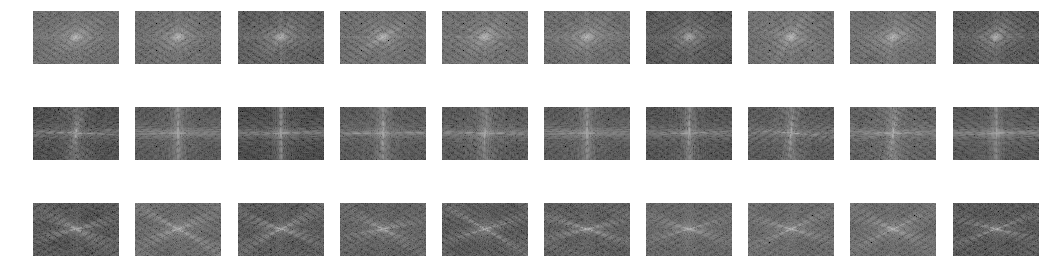

In [936]:
def plot_fouriers(fouriers_arr):
    plotID = 1
    fig = plt.figure(figsize=(18, 5))
    for i in range(3):
        for j in range(10):
            ax = fig.add_subplot(3, 10, plotID)
            ax.axis('off')
            ax.imshow( np.log( np.absolute(fouriers_arr[i, j]) + 1 ), cmap='gray' ) # io.
            plotID += 1

# reshape array of fourier spaces to dim=3x10
fouriers_reshaped = np.array(fouriers).reshape(3, 10, 400, 640)  

# plot the fourier spaces
plot_fouriers(fouriers_reshaped)


## Compute features
Compute the three features for each image. Each feature is the power of each region in the image.

In [937]:
#region_pows[imageNum][regionNum]
#regions[imageNum][regionNum]
region_pows = [[0 for x in range(3)] for y in range(30)]

for i in range(30):
    region_pows[i][0] = get_power(fouriers[i], 0, False)
    region_pows[i][1] = get_power(fouriers[i], 1, False)
    region_pows[i][2] = get_power(fouriers[i], 2, False)

## Compute categories and feature arrays
Compute the array `categories[30]` where the `i`th element gives the category of the `i`th image in `fouriers` array.
Computer the arrays `feature[1..3][S,T,V]_pows` which contain the 1st/2nd/3rd features of each S/T/V image.

In [938]:
categories = []
for i in range(30):
    if i < 10:
        categories.append(0)
    elif i < 20:
        categories.append(1)
    else:
        categories.append(2)

feature1S_pows = []
feature1T_pows = []
feature1V_pows = []

feature2S_pows = []
feature2T_pows = []
feature2V_pows = []

feature3S_pows = []
feature3T_pows = []
feature3V_pows = []

for item in region_pows[0:10]:
    feature1S_pows.append(item[0])
    feature2S_pows.append(item[1])
    feature3S_pows.append(item[2])
    
for item in region_pows[10:20]:
    feature1T_pows.append(item[0])
    feature2T_pows.append(item[1])
    feature3T_pows.append(item[2])

for item in region_pows[20:30]:
    feature1V_pows.append(item[0])
    feature2V_pows.append(item[1])
    feature3V_pows.append(item[2])

## Plot the powers for each region for each image against eachother

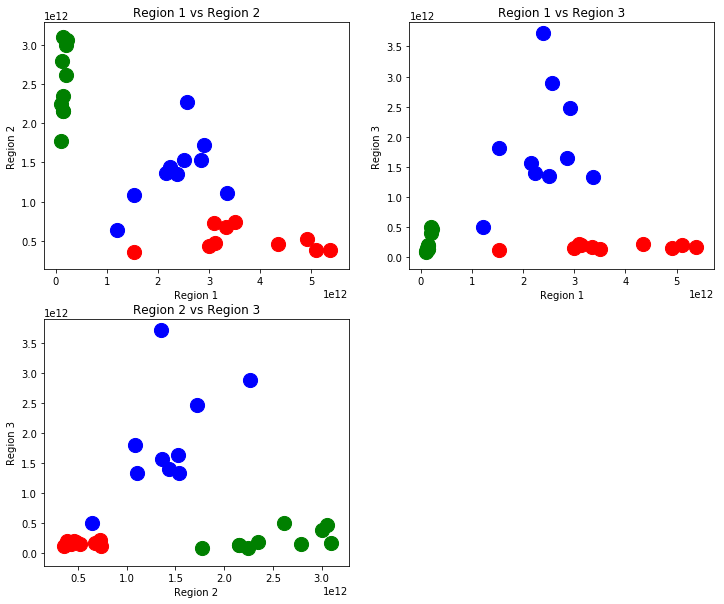

In [939]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(221)
ax1.set_title("Region 1 vs Region 2")
ax1.set_xlabel("Region 1")
ax1.set_ylabel("Region 2")
ax1.scatter(feature1S_pows, feature2S_pows, s=200, c='b')
ax1.scatter(feature1T_pows, feature2T_pows, s=200, c='g')
ax1.scatter(feature1V_pows, feature2V_pows, s=200, c='r')

ax2 = fig.add_subplot(222)
ax2.set_title("Region 1 vs Region 3")
ax2.set_xlabel("Region 1")
ax2.set_ylabel("Region 3")
ax2.scatter(feature1S_pows, feature3S_pows, s=200, c='b')
ax2.scatter(feature1T_pows, feature3T_pows, s=200, c='g')
ax2.scatter(feature1V_pows, feature3V_pows, s=200, c='r')

ax3 = fig.add_subplot(223)
ax3.set_title("Region 2 vs Region 3")
ax3.set_xlabel("Region 2")
ax3.set_ylabel("Region 3")
ax3.scatter(feature2S_pows, feature3S_pows, s=200, c='b')
ax3.scatter(feature2T_pows, feature3T_pows, s=200, c='g')
ax3.scatter(feature2V_pows, feature3V_pows, s=200, c='r')

## Calculate and plot decision boundaries

103732990007.0 5.37237559078e+12 360068306437.0 3.092756061e+12
(500, 501)
(500, 501)
103732990007.0 5.37237559078e+12 79242927762.8 3.71745156314e+12
(501, 501)
(501, 501)
360068306437.0 3.092756061e+12 79242927762.8 3.71745156314e+12
(501, 500)
(501, 500)


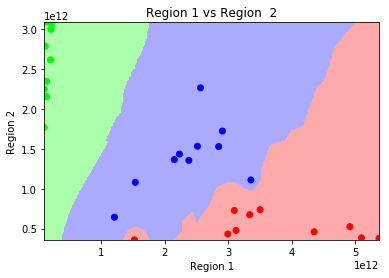

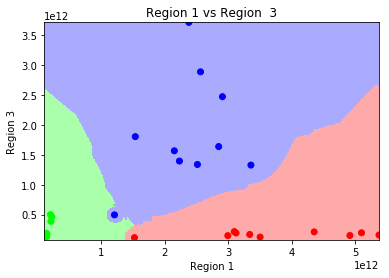

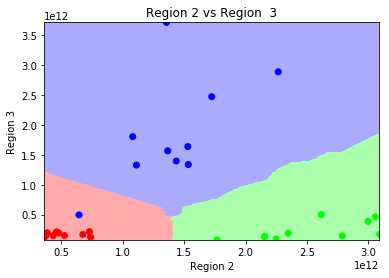

In [941]:
def selectColumns(region_pows, selected_columns):
    """given array of vectors, keeps only columns specified in array selected_columns"""
    return np.array(region_pows).T.take(selected_columns, axis=0).T


def calculateAndPlotDecisionBoundariesKNN(X, y, selected_regions):
    """ DECISION BOUNDARIES
        Plot the decision boundary. For that, we will assign a color to each
        point in the mesh [x_min, x_max]x[y_min, y_max]."""
    
    # extract the regions we want from X
    X = selectColumns(X, selected_regions)
    
    # colour maps to plot the meshgrid and training data
    cmap_light = ListedColormap(['#AAAAFF', '#AAFFAA', '#FFAAAA'])
    cmap_bold = ListedColormap(['#0000FF', '#00FF00', '#FF0000'])

    # calculate min feature values so we can create a meshgrid between these two values
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    print(x_min, x_max, y_min, y_max)
    
    # step in meshgrid
    h_x = (x_max - x_min) / 500
    h_y = (y_max - y_min) / 500

    # create meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))
    print(xx.shape)
    print(yy.shape)

    # create and train our K-Nearest Neighbour classifier
    clf.fit(X, y) # fit training data with desired two columns

    # predict class for each point in meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
    regionA = selected_regions[0] + 1;
    regionB = selected_regions[1] + 1;
    ax.set_title("Region %i vs Region % i" % (regionA, regionB))
    ax.set_xlabel("Region %i" % (regionA))
    ax.set_ylabel("Region %i" % (regionB))
    
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    
    
clf = KNeighborsClassifier(n_neighbors=10, weights='distance', p=2) # base on euclidean distance

# plot KNN decision boundaries between each region
calculateAndPlotDecisionBoundariesKNN(region_pows, categories, [0, 1])
calculateAndPlotDecisionBoundariesKNN(region_pows, categories, [0, 2])
calculateAndPlotDecisionBoundariesKNN(region_pows, categories, [1, 2])




## 1 and 2 plot weirdly beacuse x values are many orders of magnitude higher than y values,
##   which means that the distance between x coordinates maps to a relatively huge number
## to make the features have more similar values, we need to choose regions that will
## result more similar max values, i.e. capture the bright section equally well.


## Define function to black out the selected regions from a fourier space

In [ ]:
def black_regions(q):
    #get_power(q, 0, True)
    get_power(q, 1, True)
    get_power(q, 2, True)

## Load a test image and classify it

In [ ]:
img_str = os.getcwd() + '/characters/S7.GIF'
image = io.imread(img_str)
f_f = np.array(image, dtype=float)
z = np.fft.fft2(f_f)
q = np.fft.fftshift(z)

test_region_pows = []
test_region_pows.append(get_power(q, 0, False))
test_region_pows.append(get_power(q, 1, False))
test_region_pows.append(get_power(q, 2, False))

clf.fit(region_pows, categories)

category = clf.predict([test_region_pows])[0]

if category == 0:
    print ("Image is S")
elif category == 1:
    print ("Image is T")
else:
    print ("Image is V")

## Show the test image and its fourier space

In [ ]:
#black_regions(q)

fig1 = plt.figure(figsize=(15, 13))
ax1  = fig1.add_subplot( 111 )
ax1.axis('off')
# Usually for viewing purposes:
ax1.imshow( np.log( np.absolute(q) + 1 ), cmap='gray' ) # io.

w = np.fft.ifft2( np.fft.ifftshift(q) ) # do inverse fourier transform

fig2 = plt.figure(figsize=(15, 13))
ax2  = fig2.add_subplot( 111 )
ax2.axis('off')
ax2.imshow( np.array(w,dtype=int), cmap='gray' ) # io.

plt.show()

In [ ]:
# images are 400x640
# load images from gif files, perform fft to get fourier space for each
images_test = []
fouriers_test = []
cwd = os.getcwd()
for i in range(5):
    img_str = os.getcwd() + '/characters/test-S' + str(i+1) + '.GIF'
    images_test.append(io.imread(img_str))
    f_f = np.array(images_test[i], dtype=float)
    z = np.fft.fft2(f_f)
    q = np.fft.fftshift(z)
    fouriers_test.append(q)

for i in range(5):
    img_str = os.getcwd() + '/characters/test-T' + str(i+1) + '.GIF'
    images_test.append(io.imread(img_str))
    f_f = np.array(images_test[i+5], dtype=float)
    z = np.fft.fft2(f_f)
    q = np.fft.fftshift(z)
    fouriers_test.append(q)
    
for i in range(5):
    img_str = os.getcwd() + '/characters/test-V' + str(i+1) + '.GIF'
    images_test.append(io.imread(img_str))
    f_f = np.array(images_test[i+10], dtype=float)
    z = np.fft.fft2(f_f)
    q = np.fft.fftshift(z)
    fouriers_test.append(q)

In [ ]:
region_pows_test = [[0 for x in range(3)] for y in range(15)]

for i in range(15):
    region_pows_test[i][0] = get_power(fouriers_test[i], 0, False)
    region_pows_test[i][1] = get_power(fouriers_test[i], 1, False)
    region_pows_test[i][2] = get_power(fouriers_test[i], 2, False)

In [ ]:
categories_correct = []
for i in range(15):
    if i < 5:
        categories_correct.append(0)
    elif i < 10:
        categories_correct.append(1)
    else:
        categories_correct.append(2)
        
categories_test = []
for item in region_pows_test:
    categories_test.append(clf.predict([item]))

categories_test = np.concatenate(categories_test).ravel().tolist()
print(categories_test)
print(categories_correct)

In [ ]:
def get_accuracy(correct_cats, predicted_cats):
    num_right = 0
    for idx, cat in enumerate(correct_cats):
        if cat == predicted_cats[idx]:
            num_right += 1
    return np.divide(float(num_right), float(len(correct_cats))) * 100

In [ ]:
print("Accuracy of classifier for test images = ", str(get_accuracy(categories_correct, categories_test)), "%")

In [ ]:
s1_region_pows = [x[0] for idx, x in enumerate(region_pows_test) if categories_test[idx] == 0]
s2_region_pows = [x[1] for idx, x in enumerate(region_pows_test) if categories_test[idx] == 0]
s3_region_pows = [x[2] for idx, x in enumerate(region_pows_test) if categories_test[idx] == 0]

t1_region_pows = [x[0] for idx, x in enumerate(region_pows_test) if categories_test[idx] == 1]
t2_region_pows = [x[1] for idx, x in enumerate(region_pows_test) if categories_test[idx] == 1]
t3_region_pows = [x[2] for idx, x in enumerate(region_pows_test) if categories_test[idx] == 1]

v1_region_pows = [x[0] for idx, x in enumerate(region_pows_test) if categories_test[idx] == 2]
v2_region_pows = [x[1] for idx, x in enumerate(region_pows_test) if categories_test[idx] == 2]
v3_region_pows = [x[2] for idx, x in enumerate(region_pows_test) if categories_test[idx] == 2]

In [ ]:
fig3 = plt.figure(figsize=(12, 10))
ax1 = fig3.add_subplot(221)
ax1.set_title("Region 1 vs Region 2")
ax1.set_xlabel("Region 1")
ax1.set_ylabel("Region 2")
ax1.scatter(s1_region_pows, s2_region_pows, s=200, c='b')
ax1.scatter(t1_region_pows, t2_region_pows, s=200, c='g')
ax1.scatter(v1_region_pows, v2_region_pows, s=200, c='r')

ax2 = fig3.add_subplot(222)
ax2.set_title("Region 1 vs Region 3")
ax2.set_xlabel("Region 1")
ax2.set_ylabel("Region 3")
ax2.scatter(s1_region_pows, s3_region_pows, s=200, c='b')
ax2.scatter(t1_region_pows, t3_region_pows, s=200, c='g')
ax2.scatter(v1_region_pows, v3_region_pows, s=200, c='r')

ax3 = fig3.add_subplot(223)
ax3.set_title("Region 2 vs Region 3")
ax3.set_xlabel("Region 2")
ax3.set_ylabel("Region 3")
ax3.scatter(s2_region_pows, s3_region_pows, s=200, c='b')
ax3.scatter(t2_region_pows, t3_region_pows, s=200, c='g')
ax3.scatter(v2_region_pows, v3_region_pows, s=200, c='r')